In [1]:
import cv2
import csv
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display
import numpy as np
import pandas as pd
from skimage import io
from PIL import Image 

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
folder_img = '/content/drive/MyDrive/ai/imagenes/'
tags_file = '/content/drive/MyDrive/ai/Etiquetado.csv'

In [4]:
tags_df = pd.read_csv(tags_file)

In [5]:
%cd /content/
!rm -rf noticias
!git clone https://github.com/alvaro-neira/noticias.git --branch exploring
%cd noticias/
!git fetch --all
!git pull origin exploring
!git submodule init
!git submodule update

/content
Cloning into 'noticias'...
remote: Enumerating objects: 367, done.
remote: Counting objects: 100% (367/367), done.
remote: Compressing objects: 100% (258/258), done.
remote: Total 367 (delta 185), reused 278 (delta 100), pack-reused 0
Receiving objects: 100% (367/367), 199.28 MiB | 13.06 MiB/s, done.
Resolving deltas: 100% (185/185), done.
/content/noticias
Fetching origin
From https://github.com/alvaro-neira/noticias
 * branch            exploring  -> FETCH_HEAD
Already up to date.
Submodule 'Gender-and-Age-Detection' (https://github.com/alvaro-neira/Gender-and-Age-Detection.git) registered for path 'Gender-and-Age-Detection'
Submodule 'hyperface' (https://github.com/alvaro-neira/hyperface.git) registered for path 'hyperface'
Cloning into '/content/noticias/Gender-and-Age-Detection'...
Cloning into '/content/noticias/hyperface'...
Submodule path 'Gender-and-Age-Detection': checked out 'b570b6f4c7f27af2b9c8f2fe36ba112b42f4dcb2'
Submodule path 'hyperface': checked out '673f375c

In [6]:
from gender_and_age import GenderAndAge

In [13]:
gaa015 = GenderAndAge('/content/noticias/Gender-and-Age-Detection')
gaa07 = GenderAndAge('/content/noticias/Gender-and-Age-Detection')
gaa07.set_hyperparameter('conf_threshold', 0.7)
gaa015no_padding = GenderAndAge('/content/noticias/Gender-and-Age-Detection')

In [22]:
gaa015no_padding.set_padding(0)
gaa015no_padding.set_hyperparameter('conf_threshold', 0.15)


In [23]:
gaa015no_padding.get_hyperparameters()

{'conf_threshold': 0.15}

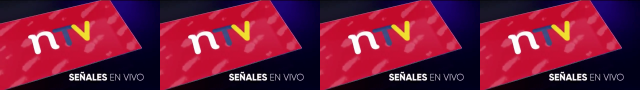

tv24horas_2022_01_06_15_frame_20423: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




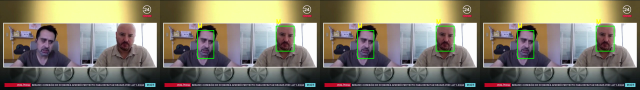

tv24horas_2022_01_06_12_frame_27000: 0.7:0f-2m, 0.15:0f-2m, no_padding:0f-2m




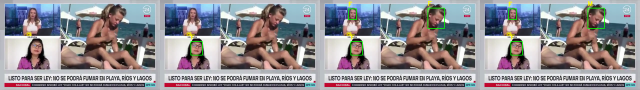

tv24horas_2022_01_06_10_frame_124425: 0.7:1f-0m, 0.15:3f-0m, no_padding:2f-1m




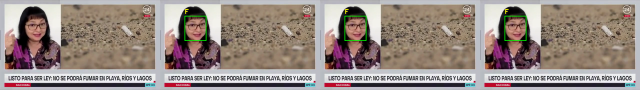

tv24horas_2022_01_06_10_frame_123624: 0.7:1f-0m, 0.15:1f-0m, no_padding:1f-0m




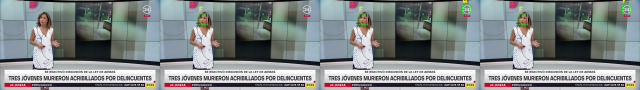

tv24horas_2022_01_05_22_frame_90000: 0.7:1f-0m, 0.15:1f-1m, no_padding:2f-0m




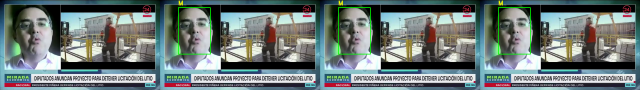

tv24horas_2022_01_08_09_frame_168922: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




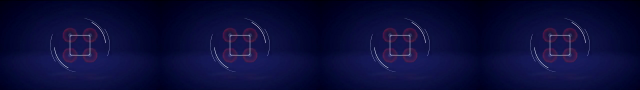

tv24horas_2022_01_08_10_frame_312: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




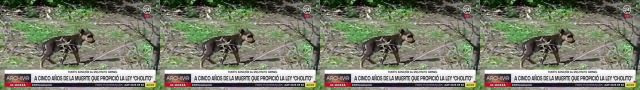

tv24horas_2022_01_07_23_frame_29630: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




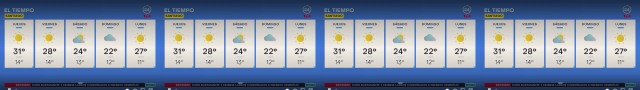

tv24horas_2021_12_08_10_frame_10388: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




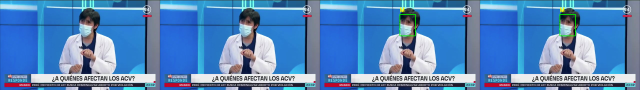

tv24horas_2021_12_11_24_frame_145323: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




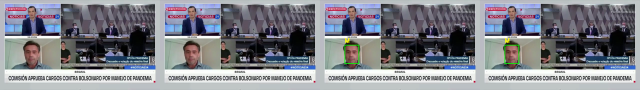

tv24horas_2021_11_02_04_frame_145696: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




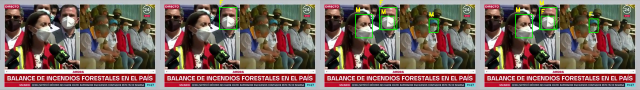

tv24horas_2021_12_27_12_frame_101832: 0.7:1f-0m, 0.15:1f-3m, no_padding:2f-2m




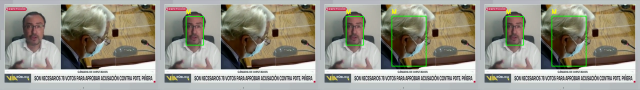

tv24horas_2021_11_11_21_frame_178179: 0.7:0f-1m, 0.15:0f-2m, no_padding:0f-2m




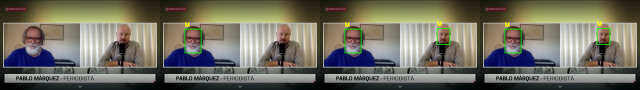

tv24horas_2021_12_03_20_frame_111648: 0.7:0f-1m, 0.15:0f-2m, no_padding:0f-2m




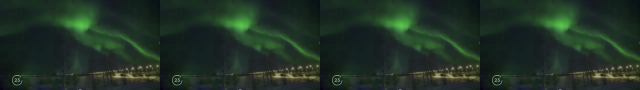

tv24horas_2021_12_29_13_frame_75318: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




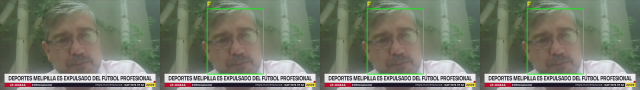

tv24horas_2021_12_27_23_frame_33800: 0.7:1f-0m, 0.15:1f-0m, no_padding:1f-0m




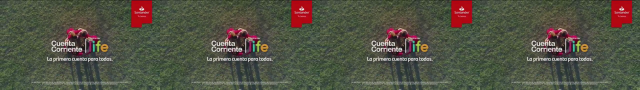

tv24horas_2021_11_05_21_frame_128121: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




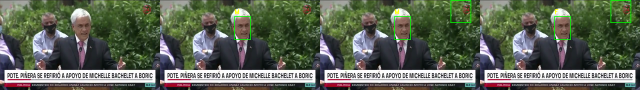

tv24horas_2021_12_16_04_frame_125565: 0.7:0f-1m, 0.15:0f-2m, no_padding:1f-1m




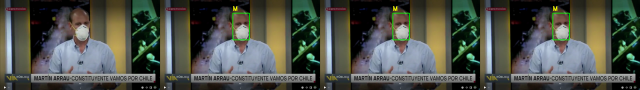

tv24horas_2021_10_28_11_frame_138600: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




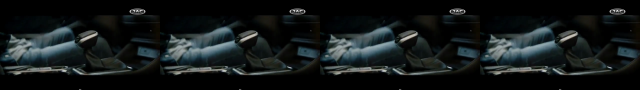

tv24horas_2021_11_09_01_frame_193292: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




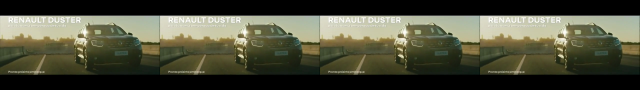

tv24horas_2021_12_15_20_frame_82298: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




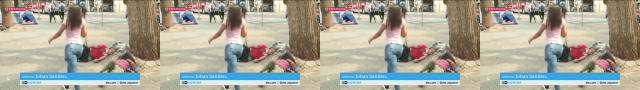

tv24horas_2021_10_30_17_frame_132573: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




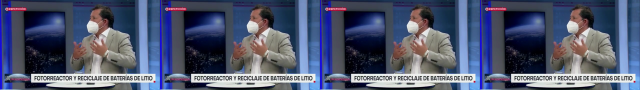

tv24horas_2021_10_30_09_frame_192234: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




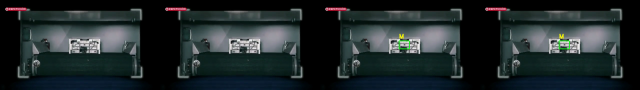

tv24horas_2021_10_29_19_frame_114636: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




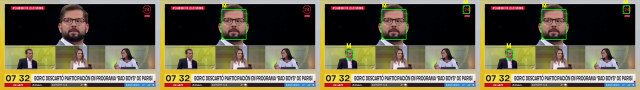

tv24horas_2021_12_09_08_frame_119828: 0.7:0f-1m, 0.15:0f-3m, no_padding:0f-3m




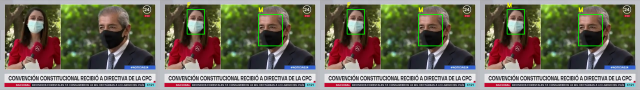

tv24horas_2021_12_27_18_frame_79329: 0.7:1f-1m, 0.15:1f-1m, no_padding:0f-2m




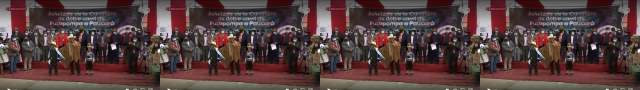

tv24horas_2021_12_01_07_frame_44949: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




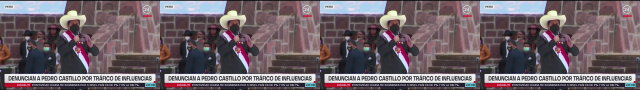

tv24horas_2021_12_18_21_frame_174996: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




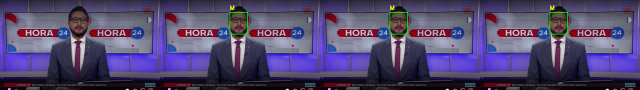

tv24horas_2021_12_08_04_frame_125777: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




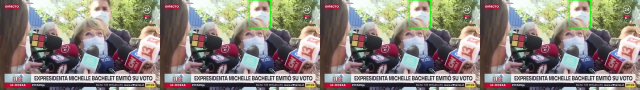

tv24horas_2021_12_19_10_frame_11138: 0.7:0f-1m, 0.15:0f-1m, no_padding:1f-0m




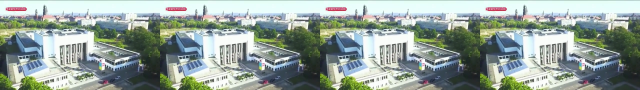

tv24horas_2021_11_08_19_frame_166269: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




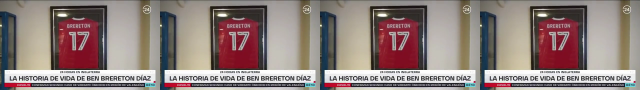

tv24horas_2021_12_09_03_frame_39623: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




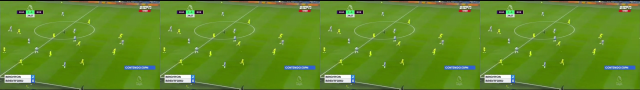

tv24horas_2021_12_28_21_frame_151449: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




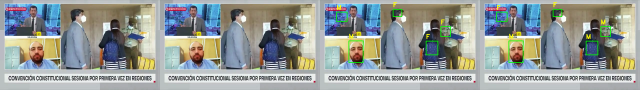

tv24horas_2021_11_25_06_frame_204955: 0.7:0f-0m, 0.15:3f-2m, no_padding:2f-3m




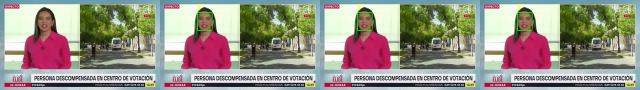

tv24horas_2021_12_19_17_frame_143041: 0.7:1f-0m, 0.15:1f-0m, no_padding:1f-0m




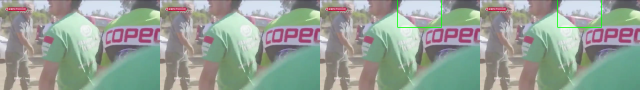

tv24horas_2021_12_29_21_frame_133480: 0.7:0f-0m, 0.15:0f-1m, no_padding:1f-0m




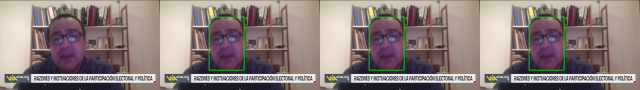

tv24horas_2021_11_04_13_frame_183075: 0.7:1f-0m, 0.15:1f-0m, no_padding:1f-0m




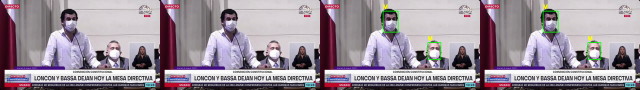

tv24horas_2022_01_04_11_frame_103956: 0.7:0f-0m, 0.15:0f-2m, no_padding:0f-2m




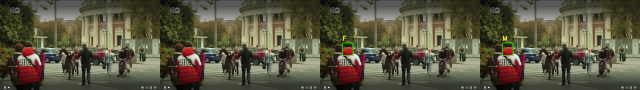

tv24horas_2021_11_16_16_frame_24973: 0.7:0f-0m, 0.15:1f-0m, no_padding:0f-1m




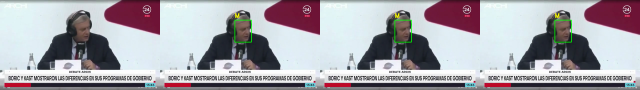

tv24horas_2021_12_10_16_frame_165483: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




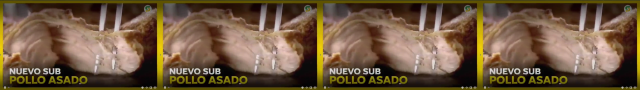

tv24horas_2021_11_06_23_frame_136870: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




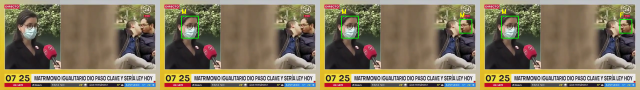

tv24horas_2021_12_07_08_frame_93608: 0.7:0f-1m, 0.15:0f-2m, no_padding:1f-1m




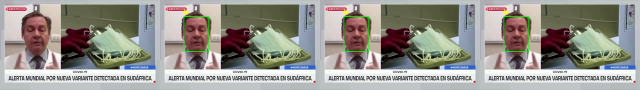

tv24horas_2021_11_28_16_frame_180569: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




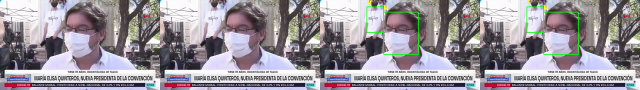

tv24horas_2022_01_05_18_frame_7807: 0.7:0f-0m, 0.15:0f-2m, no_padding:1f-1m




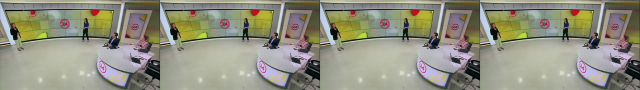

tv24horas_2021_11_12_08_frame_183656: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




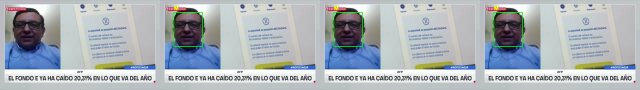

tv24horas_2021_11_02_09_frame_50245: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




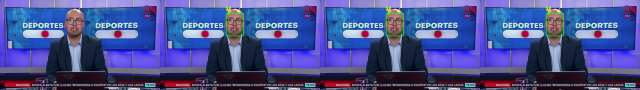

tv24horas_2022_01_01_20_frame_34914: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




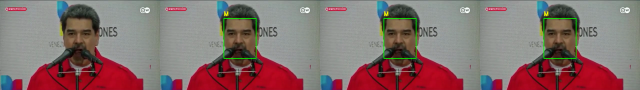

tv24horas_2021_12_02_12_frame_97210: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




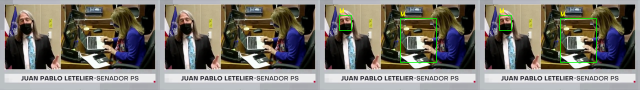

tv24horas_2021_11_09_11_frame_77334: 0.7:0f-0m, 0.15:0f-2m, no_padding:0f-2m




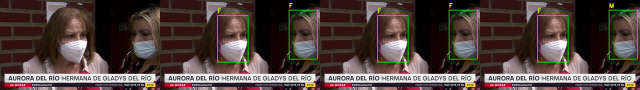

tv24horas_2021_11_01_07_frame_48852: 0.7:2f-0m, 0.15:2f-0m, no_padding:1f-1m




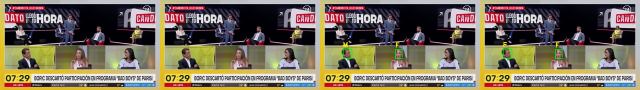

tv24horas_2021_12_09_08_frame_110565: 0.7:0f-0m, 0.15:1f-1m, no_padding:2f-0m




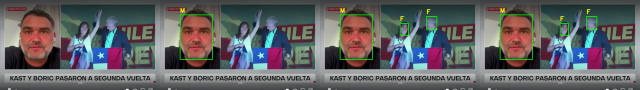

tv24horas_2021_11_24_19_frame_185951: 0.7:0f-1m, 0.15:2f-1m, no_padding:2f-1m




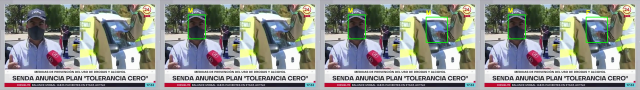

tv24horas_2022_01_01_18_frame_120866: 0.7:0f-1m, 0.15:0f-2m, no_padding:1f-1m




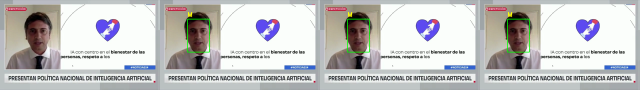

tv24horas_2021_10_29_23_frame_154048: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




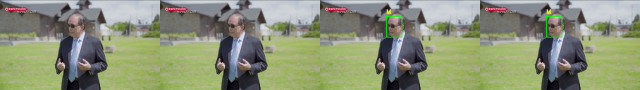

tv24horas_2021_11_14_13_frame_30039: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




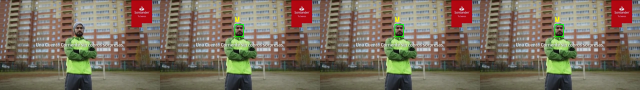

tv24horas_2021_11_03_20_frame_71549: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




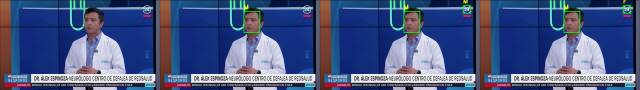

tv24horas_2022_01_07_24_frame_21503: 0.7:0f-1m, 0.15:0f-2m, no_padding:1f-1m




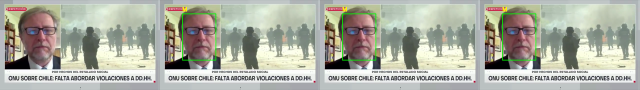

tv24horas_2021_10_27_03_frame_168761: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




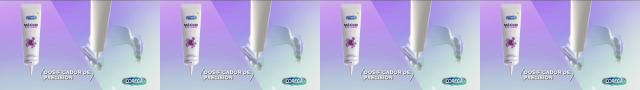

tv24horas_2021_12_05_20_frame_162573: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




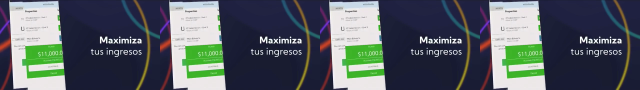

tv24horas_2021_12_16_08_frame_68304: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




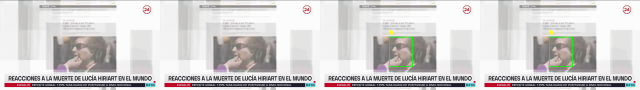

tv24horas_2021_12_17_04_frame_191904: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




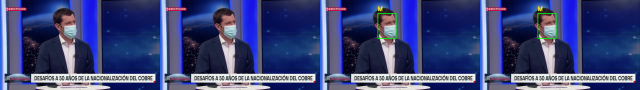

tv24horas_2021_11_04_16_frame_149523: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




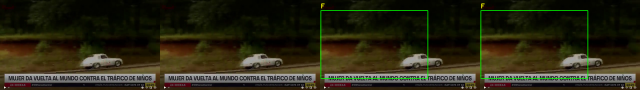

tv24horas_2021_10_28_23_frame_73192: 0.7:0f-0m, 0.15:1f-0m, no_padding:1f-0m




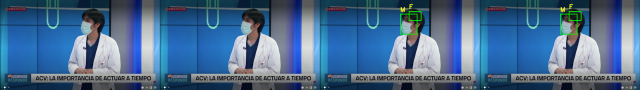

tv24horas_2021_10_28_12_frame_67325: 0.7:0f-0m, 0.15:1f-1m, no_padding:1f-1m




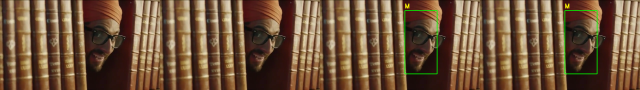

tv24horas_2021_11_10_07_frame_140125: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




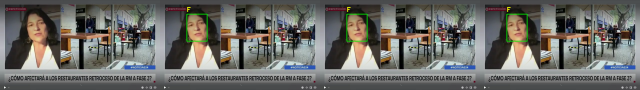

tv24horas_2021_10_29_12_frame_136356: 0.7:1f-0m, 0.15:1f-0m, no_padding:1f-0m




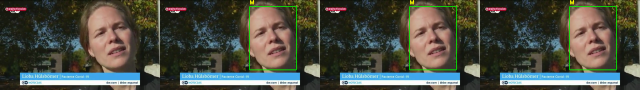

tv24horas_2021_11_11_12_frame_60358: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




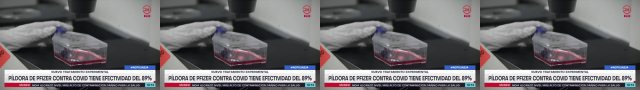

tv24horas_2021_11_05_19_frame_52383: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




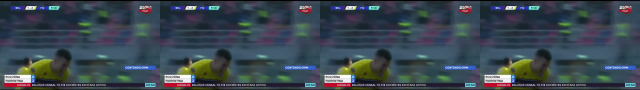

tv24horas_2021_12_07_21_frame_198282: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




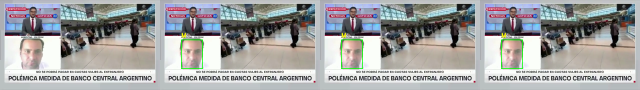

tv24horas_2021_11_27_02_frame_78862: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




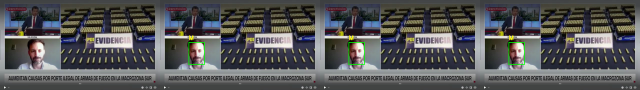

tv24horas_2021_11_17_13_frame_122811: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




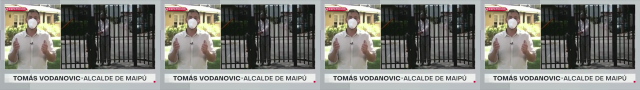

tv24horas_2021_11_01_11_frame_102015: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




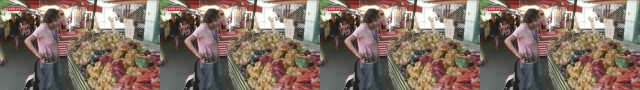

tv24horas_2021_10_29_17_frame_52016: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




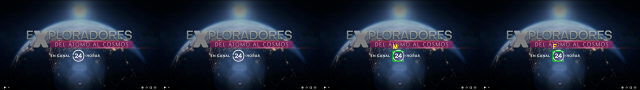

tv24horas_2021_11_06_01_frame_12683: 0.7:0f-0m, 0.15:0f-1m, no_padding:1f-0m




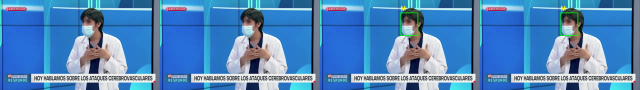

tv24horas_2021_10_27_11_frame_64707: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




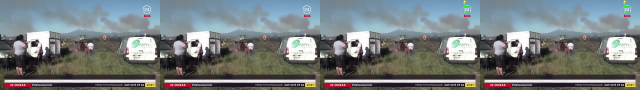

tv24horas_2021_12_26_22_frame_80760: 0.7:0f-0m, 0.15:1f-0m, no_padding:1f-0m




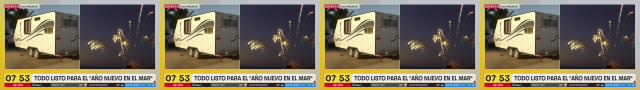

tv24horas_2021_12_31_08_frame_193532: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




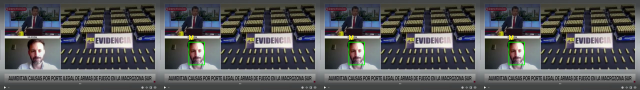

tv24horas_2021_11_17_12_frame_114903: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




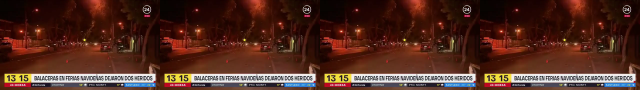

tv24horas_2021_12_13_14_frame_57283: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




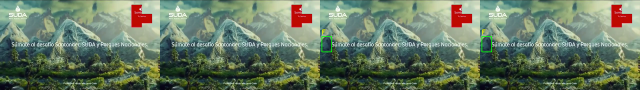

tv24horas_2021_12_16_20_frame_95143: 0.7:0f-0m, 0.15:1f-0m, no_padding:1f-0m




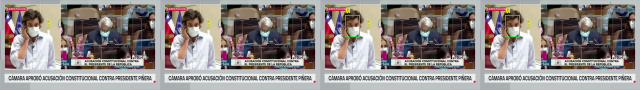

tv24horas_2021_11_10_03_frame_33840: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




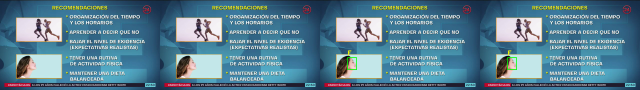

tv24horas_2021_12_31_23_frame_183262: 0.7:0f-0m, 0.15:1f-0m, no_padding:1f-0m




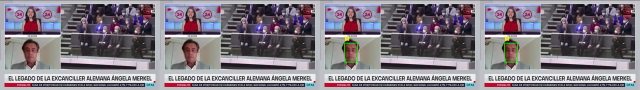

tv24horas_2021_12_09_02_frame_60833: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




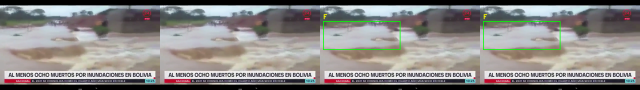

tv24horas_2021_12_22_11_frame_92426: 0.7:0f-0m, 0.15:1f-0m, no_padding:1f-0m




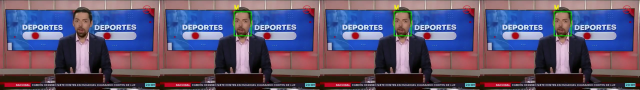

tv24horas_2021_12_11_21_frame_36443: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




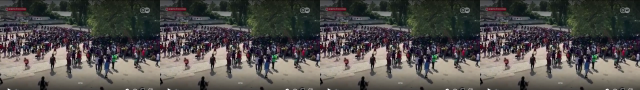

tv24horas_2021_12_01_07_frame_26536: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




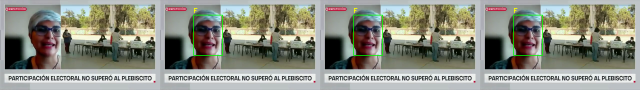

tv24horas_2021_11_23_04_frame_99057: 0.7:1f-0m, 0.15:1f-0m, no_padding:1f-0m




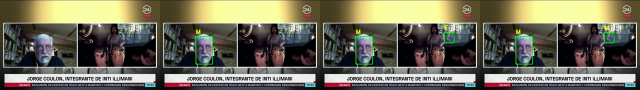

tv24horas_2021_12_12_18_frame_84785: 0.7:0f-1m, 0.15:1f-1m, no_padding:0f-2m




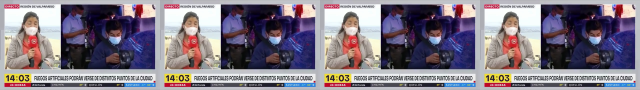

tv24horas_2021_12_28_15_frame_14709: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




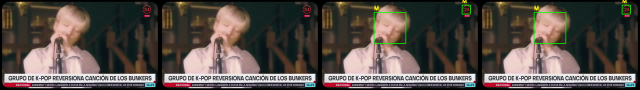

tv24horas_2021_12_17_17_frame_106996: 0.7:0f-0m, 0.15:0f-2m, no_padding:0f-2m




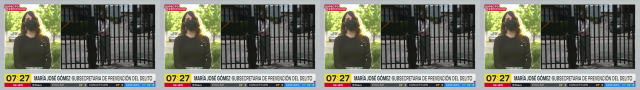

tv24horas_2021_10_29_17_frame_178451: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




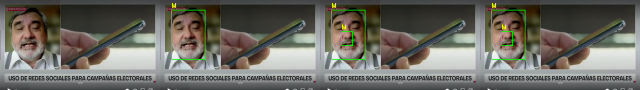

tv24horas_2021_12_01_05_frame_144469: 0.7:0f-1m, 0.15:0f-2m, no_padding:0f-2m




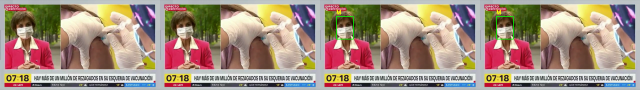

tv24horas_2021_10_29_21_frame_115162: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




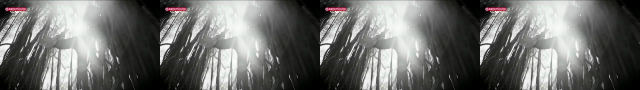

tv24horas_2021_12_29_18_frame_113973: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




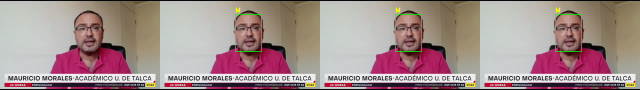

tv24horas_2021_11_23_22_frame_159108: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




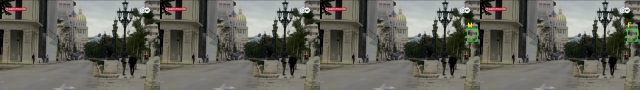

tv24horas_2021_11_24_04_frame_50098: 0.7:0f-0m, 0.15:0f-1m, no_padding:1f-0m




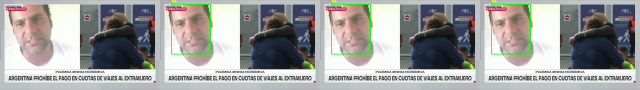

tv24horas_2021_11_28_02_frame_72086: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




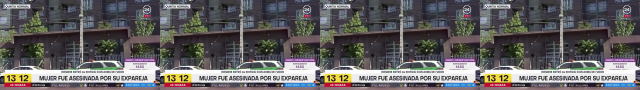

tv24horas_2021_12_13_14_frame_46097: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




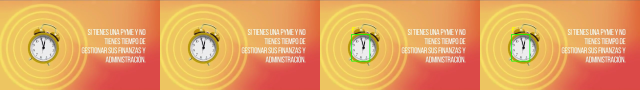

tv24horas_2021_12_16_13_frame_22521: 0.7:0f-0m, 0.15:1f-0m, no_padding:1f-0m




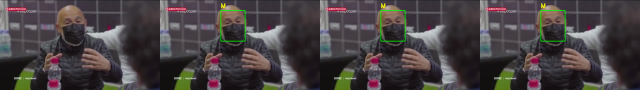

tv24horas_2021_11_30_13_frame_3140: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




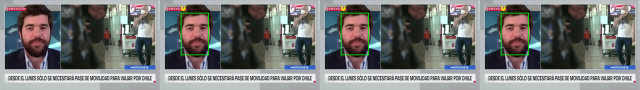

tv24horas_2021_10_30_11_frame_100564: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




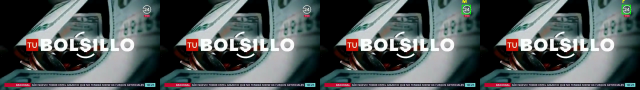

tv24horas_2021_12_17_19_frame_77476: 0.7:0f-0m, 0.15:0f-1m, no_padding:1f-0m




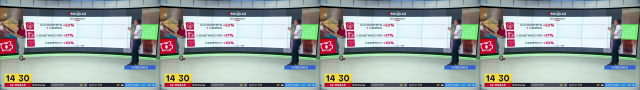

tv24horas_2021_11_30_15_frame_112960: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




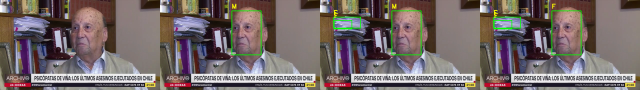

tv24horas_2021_11_01_23_frame_162966: 0.7:0f-1m, 0.15:2f-1m, no_padding:3f-0m




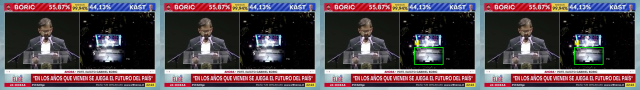

tv24horas_2021_12_19_23_frame_82479: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




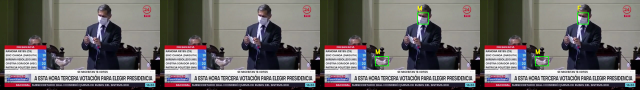

tv24horas_2022_01_04_17_frame_128318: 0.7:0f-0m, 0.15:0f-2m, no_padding:1f-1m




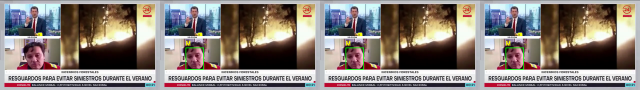

tv24horas_2021_12_07_01_frame_78696: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




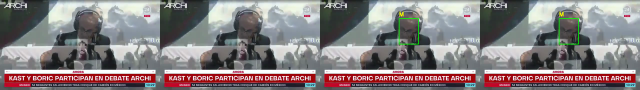

tv24horas_2021_12_10_11_frame_109513: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




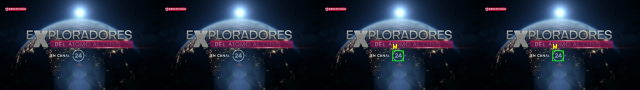

tv24horas_2021_11_01_19_frame_177982: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




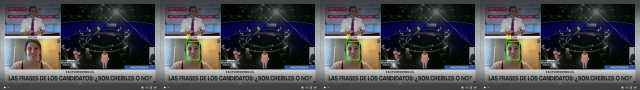

tv24horas_2021_11_18_18_frame_37652: 0.7:1f-0m, 0.15:1f-0m, no_padding:0f-1m




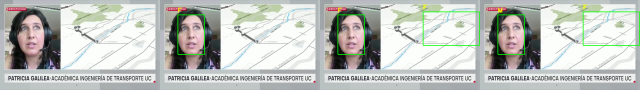

tv24horas_2021_10_29_18_frame_112056: 0.7:1f-0m, 0.15:2f-0m, no_padding:1f-1m




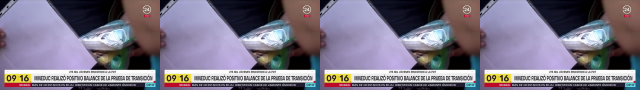

tv24horas_2021_12_12_10_frame_63023: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




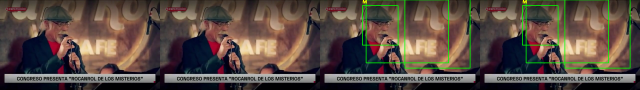

tv24horas_2021_12_03_20_frame_151310: 0.7:0f-0m, 0.15:1f-2m, no_padding:1f-2m




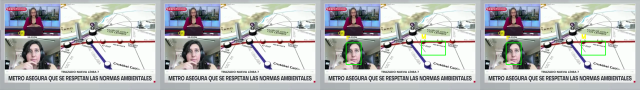

tv24horas_2021_10_30_18_frame_128163: 0.7:0f-0m, 0.15:1f-1m, no_padding:1f-1m




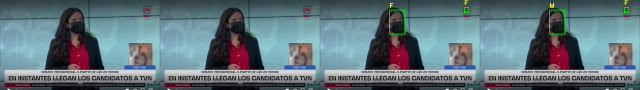

tv24horas_2021_12_13_19_frame_153855: 0.7:0f-0m, 0.15:2f-0m, no_padding:1f-1m




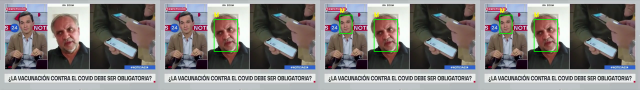

tv24horas_2021_12_30_19_frame_166738: 0.7:0f-1m, 0.15:0f-2m, no_padding:0f-2m




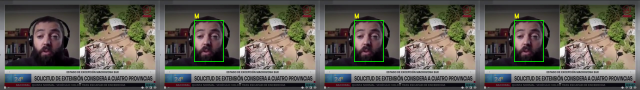

tv24horas_2021_11_07_06_frame_101437: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




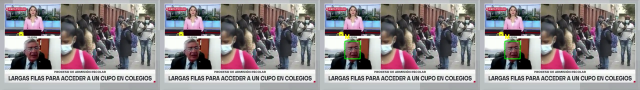

tv24horas_2021_11_29_20_frame_102944: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




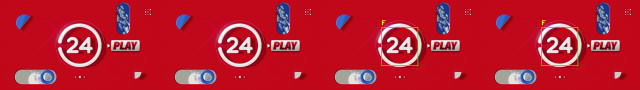

tv24horas_2021_11_26_24_frame_151347: 0.7:0f-0m, 0.15:1f-0m, no_padding:1f-0m




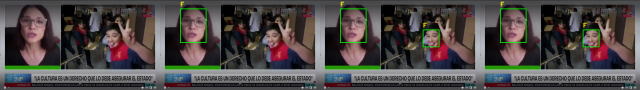

tv24horas_2021_11_07_01_frame_91768: 0.7:1f-0m, 0.15:2f-0m, no_padding:2f-0m




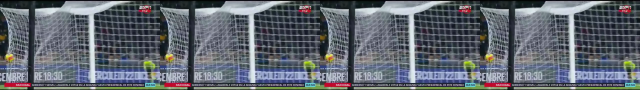

tv24horas_2021_12_18_03_frame_163186: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




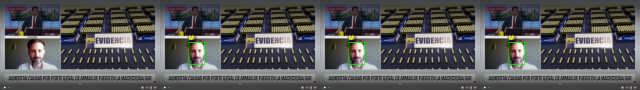

tv24horas_2021_11_17_17_frame_10942: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




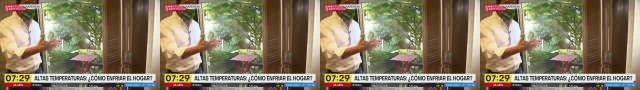

tv24horas_2021_11_29_12_frame_58006: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




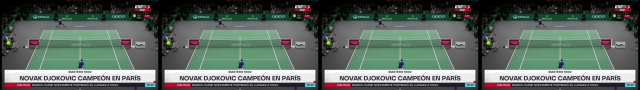

tv24horas_2021_11_07_20_frame_72766: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




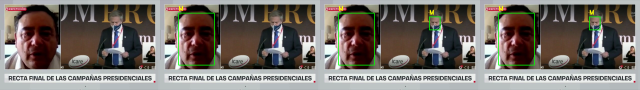

tv24horas_2021_11_13_02_frame_140565: 0.7:0f-1m, 0.15:0f-2m, no_padding:0f-2m




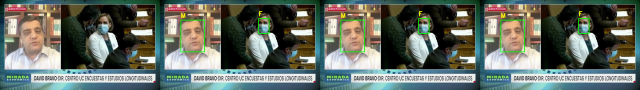

tv24horas_2021_11_05_09_frame_134998: 0.7:1f-1m, 0.15:1f-1m, no_padding:1f-1m




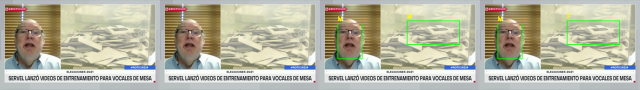

tv24horas_2021_11_14_09_frame_156037: 0.7:0f-0m, 0.15:0f-2m, no_padding:1f-1m




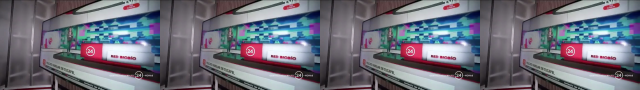

tv24horas_2021_12_16_14_frame_10133: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




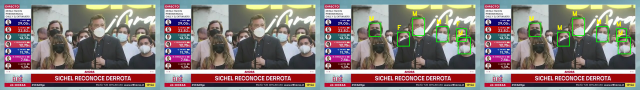

tv24horas_2021_11_21_20_frame_205608: 0.7:0f-0m, 0.15:2f-4m, no_padding:0f-6m




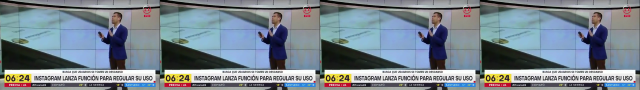

tv24horas_2021_12_09_07_frame_89423: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




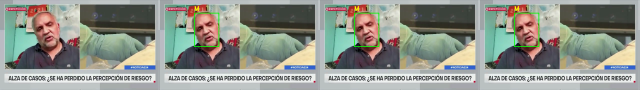

tv24horas_2021_11_01_09_frame_36433: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




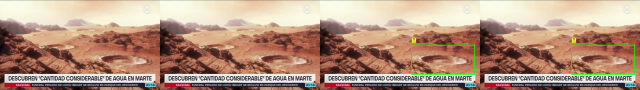

tv24horas_2021_12_18_06_frame_210566: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




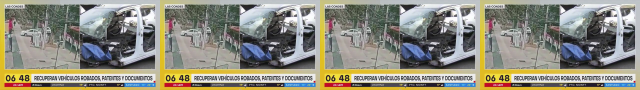

tv24horas_2021_11_11_07_frame_176750: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




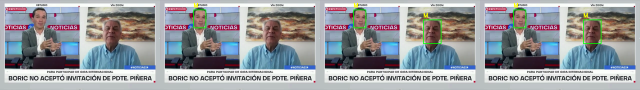

tv24horas_2021_12_29_06_frame_129414: 0.7:0f-1m, 0.15:0f-2m, no_padding:0f-2m




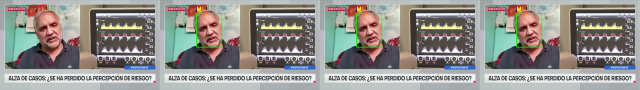

tv24horas_2021_11_01_17_frame_48152: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




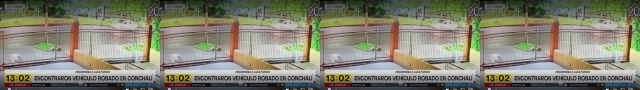

tv24horas_2021_12_02_14_frame_12699: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




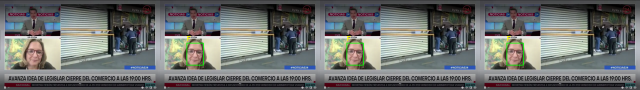

tv24horas_2021_11_06_05_frame_37195: 0.7:1f-0m, 0.15:1f-0m, no_padding:1f-0m




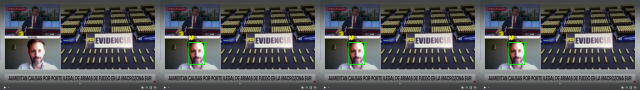

tv24horas_2021_11_18_01_frame_66381: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




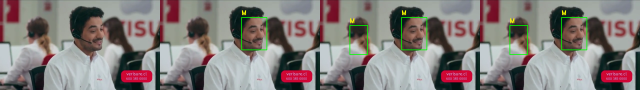

tv24horas_2021_10_26_22_frame_152693: 0.7:0f-1m, 0.15:0f-2m, no_padding:0f-2m




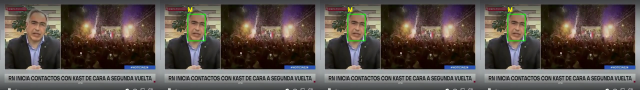

tv24horas_2021_11_24_19_frame_94029: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




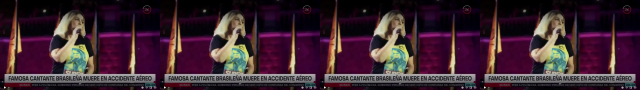

tv24horas_2021_11_06_01_frame_145686: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




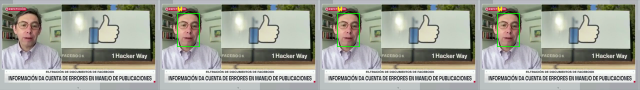

tv24horas_2021_10_27_05_frame_22992: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




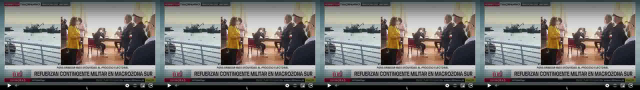

tv24horas_2021_11_21_07_frame_108219: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




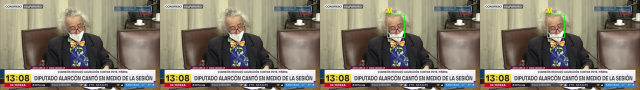

tv24horas_2021_11_05_14_frame_32891: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




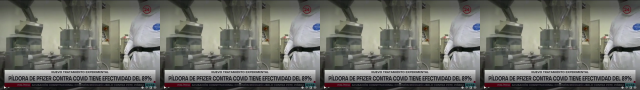

tv24horas_2021_11_06_02_frame_140461: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




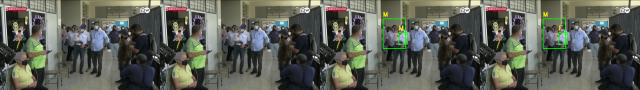

tv24horas_2021_12_01_02_frame_24713: 0.7:0f-0m, 0.15:0f-2m, no_padding:1f-1m




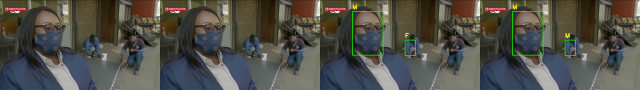

tv24horas_2021_10_29_17_frame_67134: 0.7:0f-0m, 0.15:1f-1m, no_padding:0f-2m




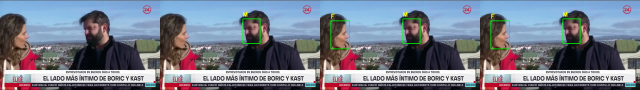

tv24horas_2021_12_17_05_frame_1995: 0.7:0f-1m, 0.15:1f-1m, no_padding:1f-1m




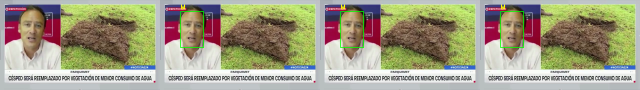

tv24horas_2021_12_31_05_frame_30778: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




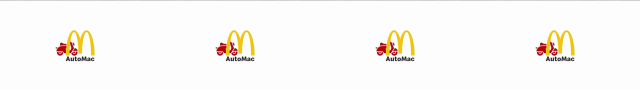

tv24horas_2021_11_25_23_frame_134379: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




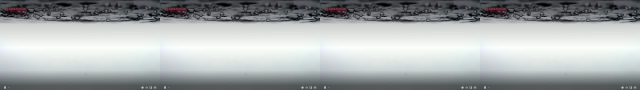

tv24horas_2021_10_28_17_frame_99870: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




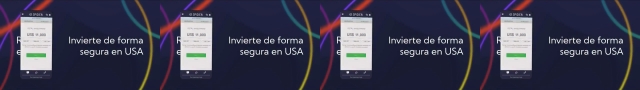

tv24horas_2021_12_12_17_frame_97203: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




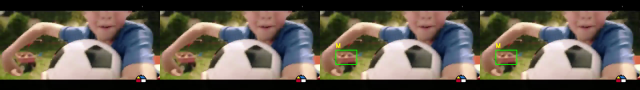

tv24horas_2021_11_09_23_frame_127836: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




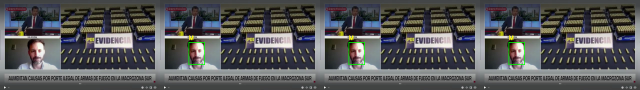

tv24horas_2021_11_17_13_frame_204429: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




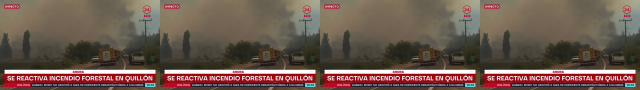

tv24horas_2021_12_27_16_frame_150545: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




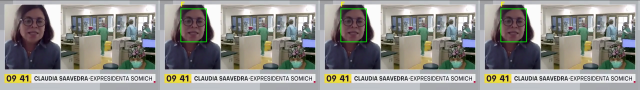

tv24horas_2021_12_26_16_frame_96702: 0.7:1f-0m, 0.15:1f-0m, no_padding:1f-0m




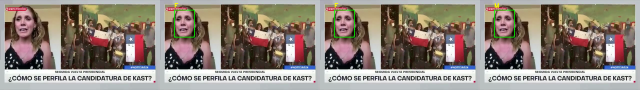

tv24horas_2021_11_23_04_frame_193252: 0.7:1f-0m, 0.15:1f-0m, no_padding:0f-1m




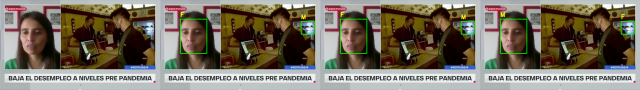

tv24horas_2021_10_27_11_frame_209507: 0.7:1f-1m, 0.15:1f-1m, no_padding:1f-1m




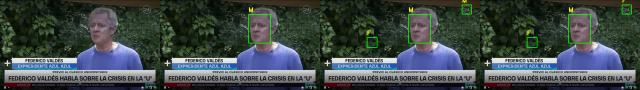

tv24horas_2021_11_07_03_frame_132350: 0.7:0f-1m, 0.15:1f-2m, no_padding:2f-1m




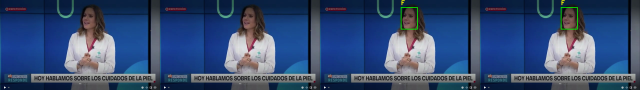

tv24horas_2021_11_09_18_frame_87580: 0.7:0f-0m, 0.15:1f-0m, no_padding:1f-0m




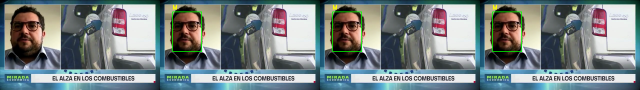

tv24horas_2021_11_20_13_frame_200446: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




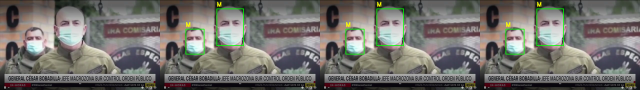

tv24horas_2021_11_09_06_frame_117132: 0.7:0f-2m, 0.15:0f-2m, no_padding:0f-2m




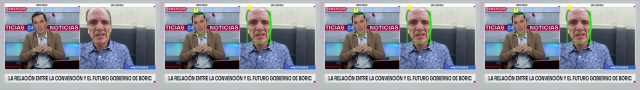

tv24horas_2021_12_29_24_frame_156953: 0.7:0f-2m, 0.15:0f-2m, no_padding:0f-2m




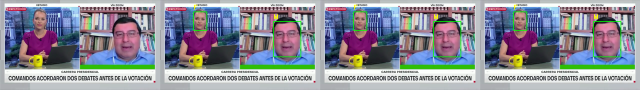

tv24horas_2021_12_01_24_frame_11433: 0.7:1f-1m, 0.15:1f-1m, no_padding:1f-1m




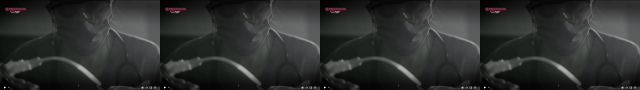

tv24horas_2021_10_29_01_frame_99034: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




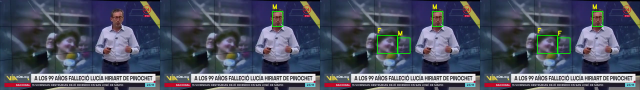

tv24horas_2021_12_16_24_frame_43878: 0.7:0f-1m, 0.15:1f-2m, no_padding:2f-1m




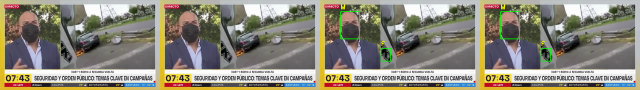

tv24horas_2021_11_23_08_frame_157791: 0.7:0f-0m, 0.15:1f-1m, no_padding:1f-1m




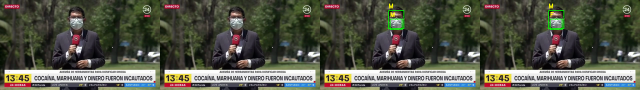

tv24horas_2021_11_05_14_frame_165014: 0.7:0f-0m, 0.15:0f-2m, no_padding:1f-1m




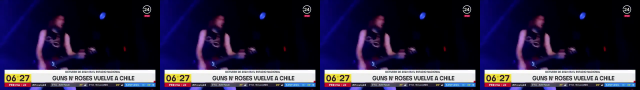

tv24horas_2021_12_22_07_frame_99997: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




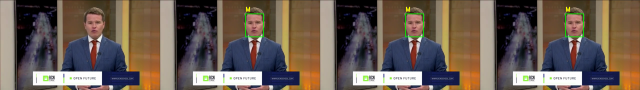

tv24horas_2021_11_04_13_frame_159076: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




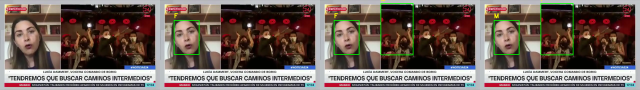

tv24horas_2021_11_24_02_frame_126761: 0.7:1f-0m, 0.15:1f-1m, no_padding:1f-1m




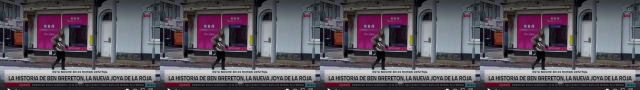

tv24horas_2021_12_08_19_frame_98822: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




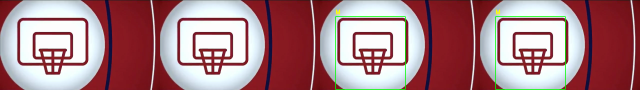

tv24horas_2021_12_25_16_frame_87881: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




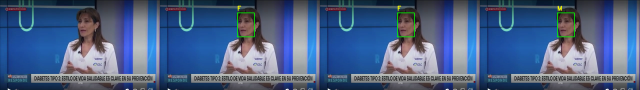

tv24horas_2021_11_30_05_frame_199282: 0.7:1f-0m, 0.15:1f-0m, no_padding:0f-1m




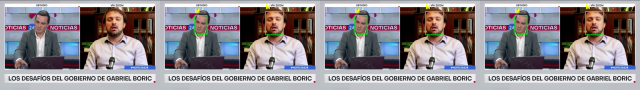

tv24horas_2021_12_28_01_frame_102668: 0.7:0f-2m, 0.15:0f-2m, no_padding:0f-2m




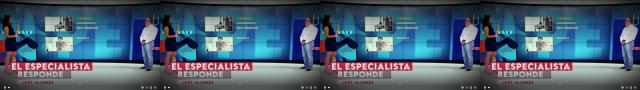

tv24horas_2021_11_16_15_frame_103401: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




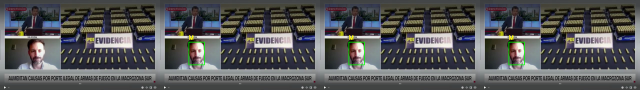

tv24horas_2021_11_17_09_frame_185394: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




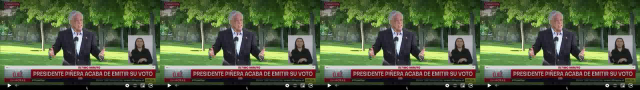

tv24horas_2021_11_21_09_frame_96743: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




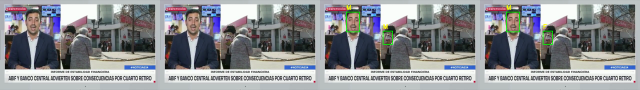

tv24horas_2021_11_13_03_frame_193704: 0.7:0f-0m, 0.15:0f-2m, no_padding:1f-1m




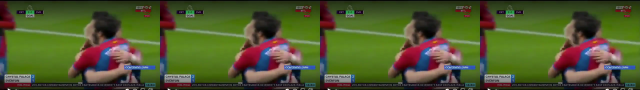

tv24horas_2021_12_12_19_frame_146832: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




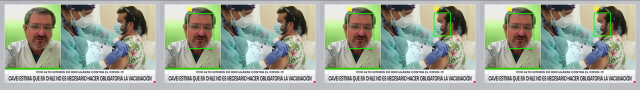

tv24horas_2021_12_30_16_frame_85582: 0.7:0f-1m, 0.15:0f-2m, no_padding:0f-2m




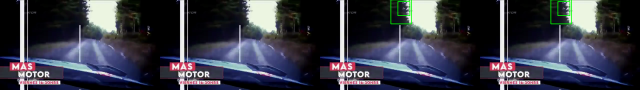

tv24horas_2021_11_07_16_frame_56931: 0.7:0f-0m, 0.15:2f-0m, no_padding:2f-0m




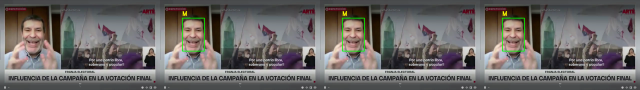

tv24horas_2021_10_27_12_frame_80885: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




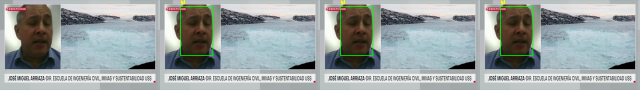

tv24horas_2021_10_30_24_frame_163623: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




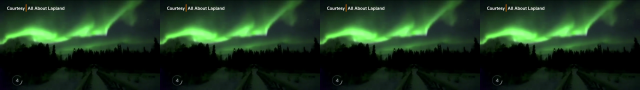

tv24horas_2021_10_31_21_frame_73134: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




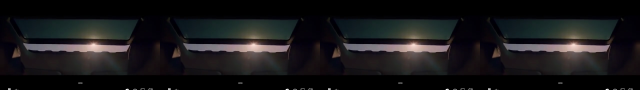

tv24horas_2021_11_24_15_frame_125294: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




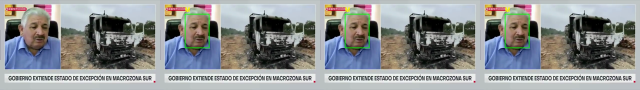

tv24horas_2021_10_30_20_frame_11521: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




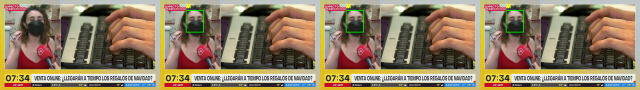

tv24horas_2021_11_27_02_frame_188773: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




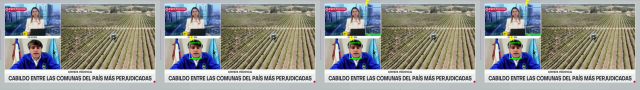

tv24horas_2021_11_08_10_frame_207733: 0.7:0f-1m, 0.15:1f-1m, no_padding:1f-1m




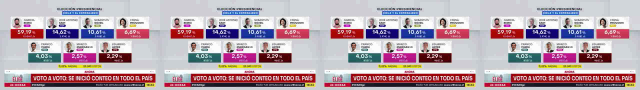

tv24horas_2021_11_21_19_frame_123071: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




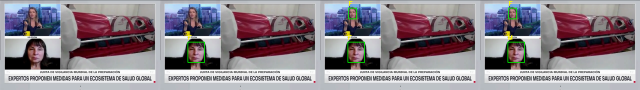

tv24horas_2021_10_27_16_frame_62249: 0.7:1f-0m, 0.15:2f-0m, no_padding:1f-1m




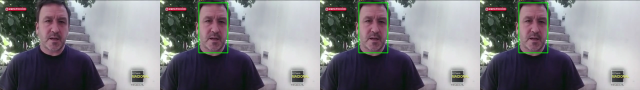

tv24horas_2021_12_28_19_frame_6423: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




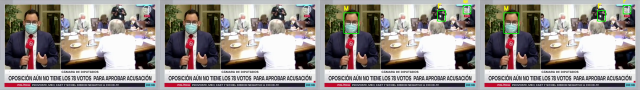

tv24horas_2021_11_08_09_frame_175946: 0.7:0f-0m, 0.15:1f-2m, no_padding:2f-1m




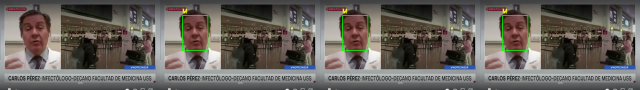

tv24horas_2021_11_28_20_frame_2732: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




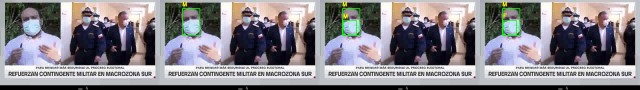

tv24horas_2021_11_21_02_frame_98487: 0.7:0f-1m, 0.15:0f-2m, no_padding:1f-1m




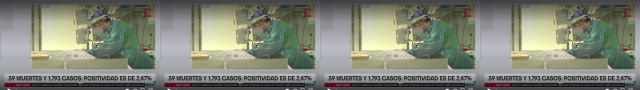

tv24horas_2021_12_10_08_frame_202311: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




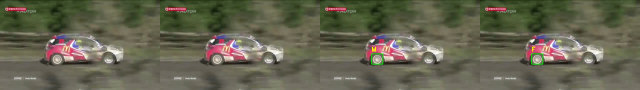

tv24horas_2021_11_15_02_frame_42206: 0.7:0f-0m, 0.15:0f-1m, no_padding:1f-0m




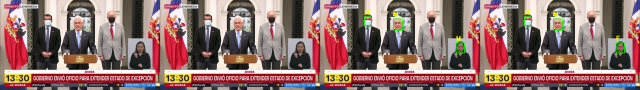

tv24horas_2021_11_04_14_frame_110016: 0.7:0f-0m, 0.15:0f-3m, no_padding:1f-2m




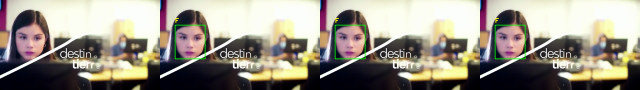

tv24horas_2021_10_28_19_frame_67172: 0.7:1f-0m, 0.15:1f-0m, no_padding:1f-0m




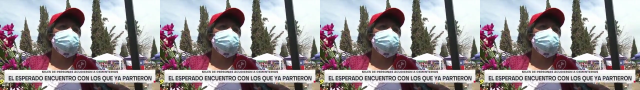

tv24horas_2021_11_01_23_frame_18075: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




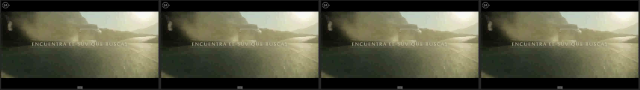

tv24horas_2021_11_07_15_frame_7742: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




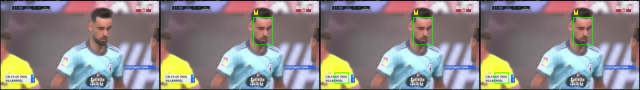

tv24horas_2021_11_20_20_frame_65752: 0.7:0f-1m, 0.15:0f-2m, no_padding:0f-2m




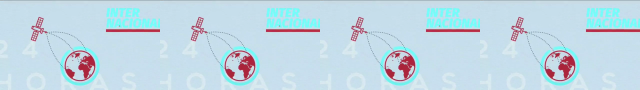

tv24horas_2021_11_05_16_frame_54604: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




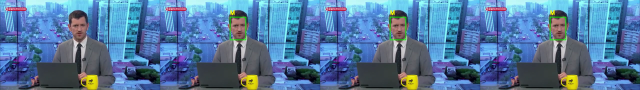

tv24horas_2021_11_25_01_frame_55754: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




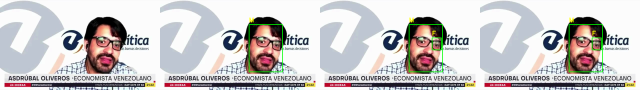

tv24horas_2021_11_01_23_frame_106889: 0.7:0f-1m, 0.15:1f-1m, no_padding:1f-1m




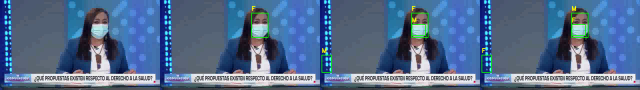

tv24horas_2021_11_14_12_frame_124685: 0.7:1f-0m, 0.15:1f-2m, no_padding:2f-1m




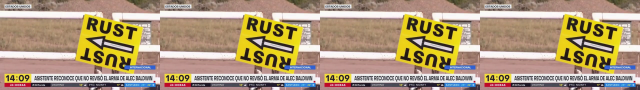

tv24horas_2021_10_28_15_frame_35533: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




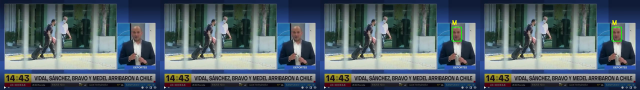

tv24horas_2021_11_09_15_frame_159257: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




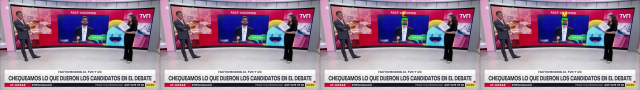

tv24horas_2021_11_15_24_frame_183429: 0.7:0f-0m, 0.15:1f-0m, no_padding:0f-1m




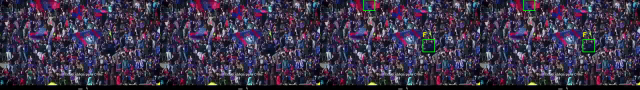

tv24horas_2021_11_21_02_frame_106059: 0.7:0f-0m, 0.15:1f-1m, no_padding:2f-0m




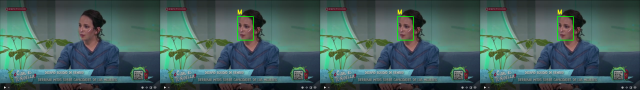

tv24horas_2021_10_28_11_frame_185771: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




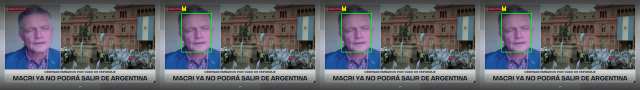

tv24horas_2021_12_03_17_frame_147743: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




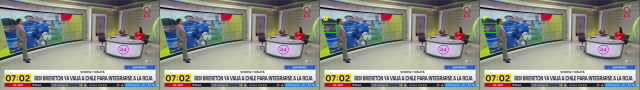

tv24horas_2021_11_08_08_frame_10619: 0.7:0f-0m, 0.15:0f-1m, no_padding:1f-0m




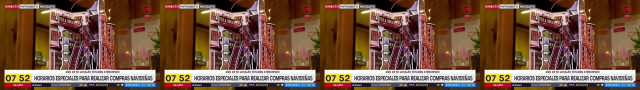

tv24horas_2021_12_06_08_frame_190589: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




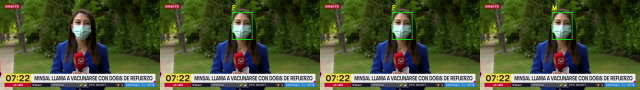

tv24horas_2021_10_27_08_frame_82492: 0.7:1f-0m, 0.15:1f-0m, no_padding:0f-1m




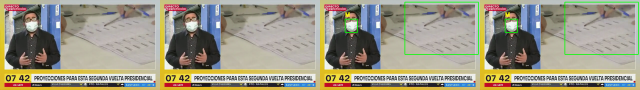

tv24horas_2021_11_23_20_frame_14485: 0.7:0f-0m, 0.15:0f-2m, no_padding:1f-1m




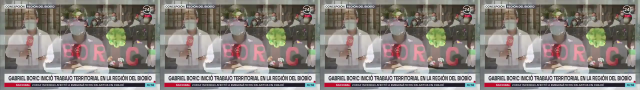

tv24horas_2021_12_05_17_frame_69399: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




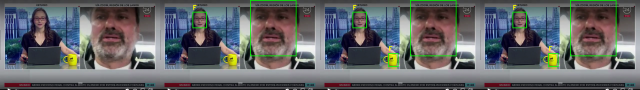

tv24horas_2021_12_13_12_frame_177150: 0.7:1f-1m, 0.15:2f-1m, no_padding:2f-1m




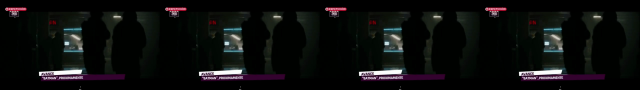

tv24horas_2021_10_27_09_frame_144828: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




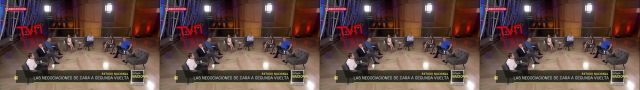

tv24horas_2021_11_23_10_frame_71058: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




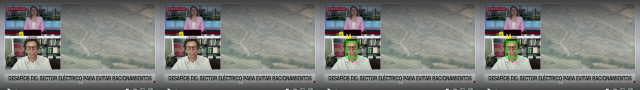

tv24horas_2021_11_30_07_frame_116223: 0.7:0f-0m, 0.15:0f-1m, no_padding:0f-1m




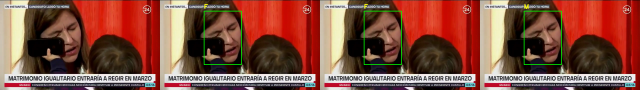

tv24horas_2021_12_09_06_frame_60922: 0.7:1f-0m, 0.15:1f-0m, no_padding:0f-1m




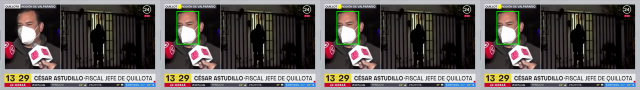

tv24horas_2021_12_17_14_frame_108618: 0.7:0f-1m, 0.15:0f-1m, no_padding:0f-1m




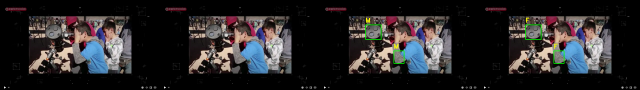

tv24horas_2021_10_29_03_frame_142888: 0.7:0f-0m, 0.15:0f-2m, no_padding:2f-0m




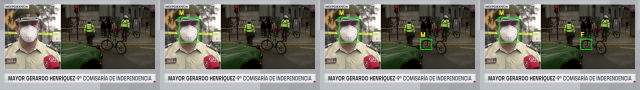

tv24horas_2021_11_04_13_frame_11325: 0.7:0f-1m, 0.15:0f-2m, no_padding:1f-1m




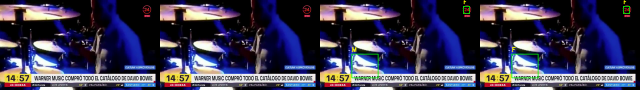

tv24horas_2022_01_06_15_frame_208843: 0.7:0f-0m, 0.15:1f-1m, no_padding:2f-0m




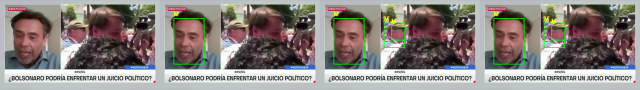

tv24horas_2021_11_03_13_frame_198756: 0.7:0f-1m, 0.15:0f-3m, no_padding:0f-3m




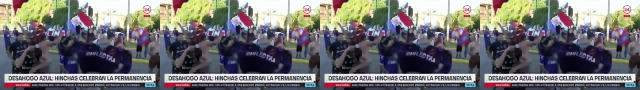

tv24horas_2021_12_06_20_frame_205620: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




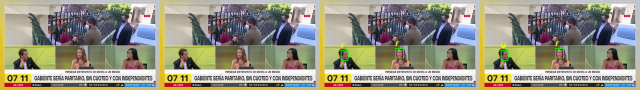

tv24horas_2022_01_10_08_frame_41242: 0.7:0f-0m, 0.15:2f-0m, no_padding:1f-1m




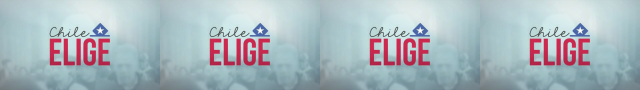

tv24horas_2021_11_20_17_frame_10042: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




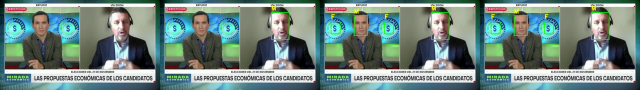

tv24horas_2021_11_14_20_frame_160768: 0.7:0f-1m, 0.15:2f-2m, no_padding:2f-2m




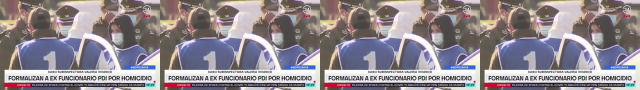

tv24horas_2021_11_05_20_frame_142065: 0.7:0f-0m, 0.15:0f-0m, no_padding:0f-0m




In [24]:
for index, row in tags_df.iterrows():    
    base_name, _ = os.path.splitext(row.video)
    image_swapped = io.imread(f"{folder_img}{base_name}_frame_{row.frame}.png") 
    image_2 = cv2.cvtColor(image_swapped, cv2.COLOR_BGR2RGB)
    ret, fra=gaa015.detect_for_colab(image_2, base_name)
    ret07, fra07=gaa07.detect_for_colab(image_2, base_name)
    ret3, fra3=gaa015no_padding.detect_for_colab(image_2, base_name)
    final_frame = cv2.hconcat((image_2, fra07, fra, fra3))
    cv2_imshow(cv2.resize(final_frame, (640,90), interpolation = cv2.INTER_AREA))
    print(f"{base_name}_frame_{row.frame}: 0.7:{ret07}, 0.15:{ret}, no_padding:{ret3}")
    print('\n')       
    